# TP 2 : Classification de caractéristiques locales, Approches supervisée (bayésienne) et non supervisée (K-Means)

----------
# Préliminaires couleurs
-------

Dimension de l'image : 307 lignes x 835 colonnes x 3 canaux


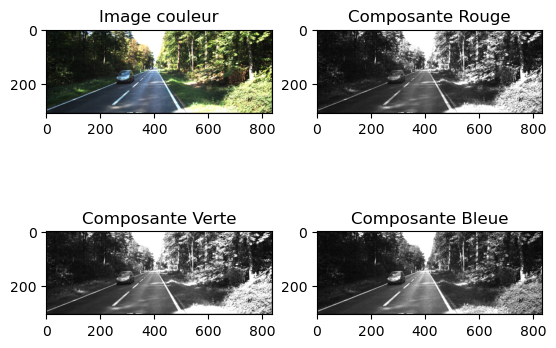

Type de l'image : uint8


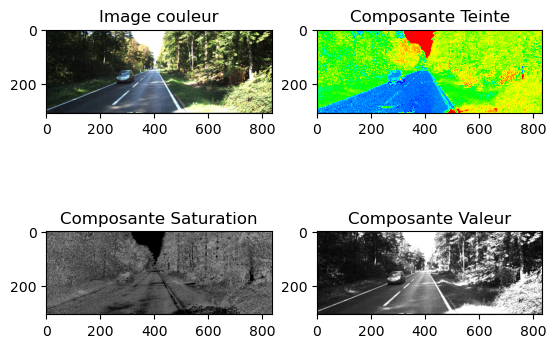

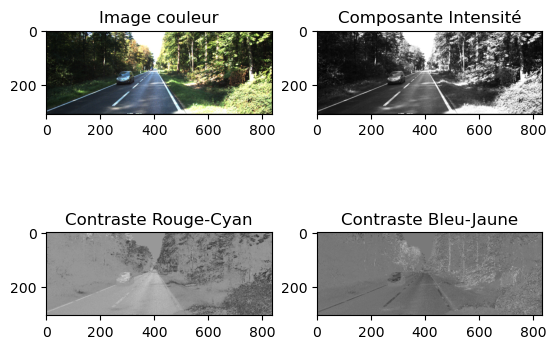

In [86]:
import numpy as np
import cv2
import sys
import os

from matplotlib import pyplot as plt

img_bgr=cv2.imread("C:/Users/gauth/Documents/2A/MI204/Images_Classif/Kitti_road/008.png")
(h,w,c) = img_bgr.shape
print("Dimension de l'image :",h,"lignes x",w,"colonnes x",c,"canaux")

b,g,r = cv2.split(img_bgr) # On récupère les 3 composantes   
img_rgb = cv2.merge([r,g,b]) # Convention matplotlib  

#Affichage des composantes RGB
plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Image couleur')
plt.subplot(222)
plt.imshow(r,cmap = 'gray')
plt.title('Composante Rouge')
plt.subplot(223)
plt.imshow(g,cmap = 'gray')
plt.title('Composante Verte')
plt.subplot(224)
plt.imshow(b,cmap = 'gray')
plt.title('Composante Bleue')
plt.show()

img_hsv =  cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(img_hsv) # On récupère les 3 composantes

#Affichage des composantes HSV
plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Image couleur')
plt.subplot(222)
plt.imshow(h,cmap = 'hsv')
plt.title('Composante Teinte')
print("Type de l'image :",h.dtype)
plt.subplot(223)
plt.imshow(s,cmap = 'gray')
plt.title('Composante Saturation')
plt.subplot(224)
plt.imshow(v,cmap = 'gray')
plt.title('Composante Valeur')
plt.show()

img_yuv =  cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)
y,cr,cb = cv2.split(img_yuv) # On récupère les 3 composantes

#Affichage des composantes YUV
plt.subplot(221)
plt.imshow(img_rgb)
plt.title('Image couleur')
plt.subplot(222)
plt.imshow(y,cmap = 'gray')
plt.title('Composante Intensité')
plt.subplot(223)
plt.imshow(cr,cmap = 'gray')
plt.title('Contraste Rouge-Cyan')
plt.subplot(224)
plt.imshow(cb,cmap = 'gray')
plt.title('Contraste Bleu-Jaune')
plt.show()



----------
# Méthode KMEans
-------

In [84]:
import numpy as np
import cv2
import sys
import matplotlib as plt
from matplotlib import pyplot as plt

from sklearn.cluster import KMeans

def affichage_et_collecte_statistiques_kmeans(img_bgr,clf,i,sauvegarde_fichier,val):
    nb_pts_classe_positif= compteur_points_verif()
    nb_pts_positifs_correctement_attribués=0
    for y in range (150,307):
        for x in range (f(y),g(y)):
            if img_bgr[y,x]==val:
                nb_pts_positifs_correctement_attribués+=1
    nb_pts_positifs_mal_attribués=0
    for y in range (150,h_img):
        for x in range (0,f(y)):
            if img_bgr[y,x]==val:
                nb_pts_positifs_mal_attribués+=1
    for x in range (g(y),w_img):
        if img_bgr[y,x]==val:
            nb_pts_positifs_mal_attribués+=1
    for y in range (0,150):
        if img_bgr[y,x]==val:
            nb_pts_positifs_mal_attribués+=1
    print('image n°'+i+"  "+str(clf))
    
    #r1=100*nb_pts_positifs_correctement_attribués/nb_pts_classe_positif
    #print("ratio bonne analyse",r1)
    
    #r2=100*nb_pts_positifs_mal_attribués/nb_pts_classe_negatif
    #print("ratio mauvaise analyse",r2)
    
    #if nb_pts_positifs_correctement_attribués==0:
    #    r3=-1
    #else:
    #    r3=100*nb_pts_positifs_correctement_attribués/(nb_pts_positifs_mal_attribués+nb_pts_positifs_correctement_attribués)
    #print("accuracy",r3)
    
    r4=nb_pts_positifs_correctement_attribués/nb_pts_classe_positif
    print("rappel",r4)
    
    r5=nb_pts_positifs_correctement_attribués/(nb_pts_positifs_correctement_attribués+nb_pts_positifs_mal_attribués)
    print("précision",r5)
    
    r6=2*(r4*r5)/(r4+r5)
    print("F-mesure",r6)
    print("\n \n")
    
    if sauvegarde_fichier==True:
        fichier = open("analyse_qualite.txt", "a")
        fichier.write("\n"+i+";"+str(clf)+";"+str(r4)+";"+str(r5)+";"+str(r6))
        fichier.close()





clf="kmeans"
img_bgr=cv2.imread("/Users/henriguisnet/Documents/Etudes/2A/Cours/MI204/TPn°2/Images_Classif/Kitti_Road/008.png")
(h_img,w_img,c) = img_bgr.shape
print("Dimension de l'image :",h_img,"lignes x",w_img,"colonnes x",c,"canaux")
print("Type de l'image :",img_bgr.dtype)

# Création des clusters (entraînement) sur une image
Nb_classes = 6
img_samples = np.reshape(img_bgr,(-1,3))
kmeans = KMeans(n_clusters=Nb_classes, random_state=0).fit(img_samples)
# Affichage des centres de cluster 
print("Centres des clusters : ",kmeans.cluster_centers_)
# Affichage des labels dans l'image d'entraînement
img_labels = np.reshape(kmeans.labels_,(h_img,w_img))
print("Type de l'image de label :",img_labels.dtype)
# Normalisation pour affichage
img_labels_display = (img_labels*255)/(Nb_classes - 1)
img_labels_display2 = img_labels_display.astype(np.uint8)
print(img_labels_display2)
print("Clusters dans l'image (train)")
affichage_et_collecte_statistiques_kmeans(img_labels_display2,clf,str(0),False,51)

        
plt.imshow(img_labels_display2)
plt.show()
#cv2.waitKey(0)


AttributeError: 'NoneType' object has no attribute 'shape'

----------
# Méthode Bayes
-------

----------------------
## Import des modules
-----------------

In [57]:
import numpy as np
import cv2
import sys
from matplotlib import pyplot as plt
import matplotlib.patches as patches

# Classification Bayésienne avec distribution gaussienne multidimensionnelle :
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
#Idem, avec indépendance par composantes (i.e. covariance diagonale)
from sklearn.naive_bayes import GaussianNB 

from __future__ import print_function
import argparse

----------------
## Définition des fonctions utilisées 
------------------

In [58]:
def changement_couleur_image(img_bgr,path_sortie, enregistrement_local):
    (h_img,w_img,c_img) = img_bgr.shape
    print("Dimension de l'image :",h_img,"lignes x",w_img,"colonnes x",c_img,"canaux") 
    print("Type de l'image :",img_bgr.dtype)

    #le prgrm mange de l'image rgb, l'objectif est donc de récupérer l'image hsv seulement selon h mais dans le domaine rgb
    ## objectif : bgr->hsv->bgr->rgb
    img_hsv =  cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)#on passe en bgr 
    h,s,v = cv2.split(img_hsv) # on récupère les 3 composantes hsv
    ones=np.ones((h_img,w_img),int).astype(np.uint8)
    news=ones*255 # on suprime les variations de saturation et de luminosités
    newv=ones*255
    img_h = cv2.merge([h,news,newv])#on reconstitue la nouvelle image hcv
    img_h_rgb=cv2.cvtColor(img_h, cv2.COLOR_HSV2BGR) # on repasse en bgr
    r,g,b = cv2.split(img_h_rgb) # on passe en rgb
    img_h_bgr = cv2.merge([b,g,r])


    ## on enregistre l'image pour pouvoir la tester
    if enregistrement_local==True: 
        cv2.imwrite(path_sortie, img_h_bgr)
    return img_h_bgr

In [59]:
def detection_contour_harris(src):
    # Load source image and convert it to gray
    src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    # Create a window and a trackbar
    thresh = 200 # initial threshold
    # Detector parameters
    blockSize = 2
    apertureSize = 3
    k = 0.15
    # Detecting corners
    dst = cv2.cornerHarris(src_gray, blockSize, apertureSize, k)
    # Normalizing
    dst_norm = np.empty(dst.shape, dtype=np.float32)
    cv2.normalize(dst, dst_norm, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
    dst_norm_scaled = cv2.convertScaleAbs(dst_norm)
    return dst_norm_scaled

In [60]:
def affichage_route(img_origine,dst_norm_scaled):
    (h_img,w_img,c_img) = img_origine.shape
    img=cv2.copyMakeBorder(img_origine,0,0,0,0,cv2.BORDER_REPLICATE)
    for x in range(0,w_img-1):
        for y in range(0,h_img-1):
            if dst_norm_scaled[y,x]<100:
                img[y,x]=[255,0,0]
                # on épaissit un peu le trait pour mieux le voir 
                img[y+1,x+1]=[255,0,0]
                img[y+1,x]=[255,0,0]
                img[y,x+1]=[255,0,0]
    return img

In [61]:
# fonctions de contour
def f(y):
    return int(-2.3*(y-300))
    
def g(y):
    return int(0.58*(y+560))

In [62]:
def compteur_points_verif():
    
    # on prend une image témoin sur laquelle on a calqué un masque pour déterminer les pixels qui forment la route
    img = cv2.imread("C:/Users/gauth/Documents/2A/MI204/Images_Classif/Kitti_road/032.png")
    (h_img,w_img,c_img) = img.shape
    ### on compte le nombre de pixel sur la zone d'intérêt
    nb_pts_classe_positif=0
    for y in range (150,307):
        for x in range (f(y),g(y)):
            img[y,x]=[0,0,0]
            nb_pts_classe_positif+=1
    #plt.imshow(img)
    #plt.title("Zone de vérification manuelle de la pertinence du label route")
    #plt.show()
    #print(nb_pts_classe_positif)

    ### on compte le nombre de pixel en dehors de la zone d'intérêt 
    nb_pts_classe_negatif=0
    for y in range (150,h_img):
        for x in range (0,f(y)):
            img[y,x]=[255,255,255]
            nb_pts_classe_negatif+=1
        for x in range (g(y),w_img):
            img[y,x]=[255,255,255]
            nb_pts_classe_negatif+=1
    for y in range (0,150):
        img[y,:]=[255,255,255]
        nb_pts_classe_negatif+=1

    ### on affiche la zone d'intérêt route en noir sur fond blanc
    #plt.imshow(img)
    #plt.title("Zone de vérification manuelle de la pertinence du label route")
    #plt.show()
    #print(nb_pts_classe_negatif)

    return nb_pts_classe_positif

In [63]:
def affichage_et_collecte_statistiques(img,clf,indice_image,sauvegarde_fichier):
    
    nb_pts_classe_positif= compteur_points_verif()
    
    
    nb_pts_positifs_correctement_attribués=0
    for y in range (150,307):
        for x in range (f(y),g(y)):
            if img[y,x][1]==255:
                nb_pts_positifs_correctement_attribués+=1
                
                
    nb_pts_positifs_mal_attribués=0
    for y in range (150,h_img):
        for x in range (0,f(y)):
            if img[y,x][1]==255:
                nb_pts_positifs_mal_attribués+=1
    for x in range (g(y),w_img):
        if img[y,x][1]==255:
            nb_pts_positifs_mal_attribués+=1
    for y in range (0,150):
        if img[y,x][1]==255:
            nb_pts_positifs_mal_attribués+=1
    print('image n°'+i+"  "+str(clf))
    
    #r1=100*nb_pts_positifs_correctement_attribués/nb_pts_classe_positif
    #print("ratio bonne analyse",r1)
    
    #r2=100*nb_pts_positifs_mal_attribués/nb_pts_classe_negatif
    #print("ratio mauvaise analyse",r2)
    
    #if nb_pts_positifs_correctement_attribués==0:
    #    r3=-1
    #else:
    #    r3=100*nb_pts_positifs_correctement_attribués/(nb_pts_positifs_mal_attribués+nb_pts_positifs_correctement_attribués)
    #print("accuracy",r3)
    print("\n ************************************************* \n")
    r4=nb_pts_positifs_correctement_attribués/nb_pts_classe_positif
    print("rappel",r4)
    
    if nb_pts_positifs_correctement_attribués==0:
        r5=-1
    else:
        r5=nb_pts_positifs_correctement_attribués/(nb_pts_positifs_correctement_attribués+nb_pts_positifs_mal_attribués)
    print("précision",r5)
    
    r6=2*(r4*r5)/(r4+r5)
    print("F-mesure",r6)
    print("\n \n")
    
    if sauvegarde_fichier==True:
        
        fichier.write("\n"+i+";"+str(clf)+";"+str(r4)+";"+str(r5)+";"+str(r6))


In [64]:
def define_ROI(event, x, y, flags,param):
    # if the left mouse button was clicked, 
    # record the starting ROI coordinates 
    global c,w,h,roi_defined,r
    if event == cv2.EVENT_LBUTTONDOWN:
        r, c = x, y
        roi_defined = False
    # if the left mouse button was released,
    # record the ROI coordinates and dimensions 
    elif event == cv2.EVENT_LBUTTONUP:
        r2, c2 = x, y
        h = abs(r2-r)
        w = abs(c2-c)
        r = min(r,r2)
        c = min(c,c2) 
        roi_defined = True

        
def update_GBModel(r,c,w,h,label,img_bgr,data_features,data_labels,first):
    roi_features = img_bgr[c:c+w, r:r+h]
    print("RoI_Features :",roi_features.shape)
    roi_labels = np.full((w, h), label)
    batch_features = np.reshape(roi_features,(-1,3)) 
    batch_labels = np.ravel(roi_labels)
    if first == 1:
        first = 0
        data_features = batch_features.copy() 
        data_labels = batch_labels.copy()
    else:
        print('features')
        print(data_features)
        print('labels')
        print(data_labels)
        data_features = np.concatenate((data_features,batch_features),axis = 0) 
        data_labels = np.concatenate((data_labels,batch_labels),axis = 0)
    return(data_features,data_labels,first)

        

def feed(img_bgr,classes,data_features,data_labels,first):
    global c,w,h,roi_defined,r
    (h,w,c) = (0,0,0)
    r=0
    roi_defined = False
    clone = img_bgr.copy()
    img_temoin_copie=img_bgr.copy()
    cv2.namedWindow("Training image") 
    cv2.setMouseCallback("Training image", define_ROI) 
    num_pos = 0
    num_neg = 0
    num_ciel = 0
    while True:
    # display the image and wait for a keypress 
        cv2.imshow("Training image",img_bgr)
        key = cv2.waitKey(1) & 0xFF
    # if the ROI is defined, draw it!
        if (roi_defined):
            # draw a green rectangle around the region of interest
            cv2.rectangle(img_bgr, (r,c), (r+h,c+w), (0, 255, 0), 2)
            # else reset the image...
        else:
            img_bgr = clone.copy()
            # if the 'p' key is pressed, record a positive batch sample
        if key == ord("p"): 
            num_pos += 1
            data_features,data_labels,first=update_GBModel(r,c,w,h,1,clone,data_features,data_labels,first)
            cv2.rectangle(img_temoin_copie, (r,c), (r+h,c+w), (0, 255, 0), 2) 
            print("Batch positif n°",num_pos,"enregistré !")

            # if the 'n' key is pressed, record a positive batch sample 
        if key == ord("n"):
            num_neg += 1
            data_features,data_labels,first=update_GBModel(r,c,w,h,-1,clone,data_features,data_labels,first)
            print("Batch négatif n°",num_neg,"enregistré !")
            cv2.rectangle(img_temoin_copie, (r,c), (r+h,c+w), (255, 0, 0), 2) 
            
        if key == ord("c"):
            num_ciel += 1
            data_features,data_labels,first=update_GBModel(r,c,w,h,-2,clone,data_features,data_labels,first)
            print("Batch négatif n°",num_ciel,"enregistré !")
            cv2.rectangle(img_temoin_copie, (r,c), (r+h,c+w), (0, 0, 255), 2)
            
            # if the 'q' key is pressed, break from the loop
        if key == ord("q"): 
            break    
    plt.title('Zones retenues pour le modèle bayésien') 
    plt.imshow(img_temoin_copie)
    plt.show()
     ### Permer de fermer la fenetre sur mac... Ah Apple !!       
    cv2.waitKey(0) # close window when a key press is detected
    cv2.destroyWindow('Training image')
    cv2.waitKey(1) 
    ###        
    return(data_features,data_labels)       

-------------------------
## Entrainement / Apprentissage
--------------------------

Dimension de l'image : 307 lignes x 835 colonnes x 3 canaux
Type de l'image : uint8
RoI_Features : (80, 221, 3)
Batch positif n° 1 enregistré !
RoI_Features : (46, 101, 3)
features
[[ 56  45  36]
 [ 60  48  37]
 [ 60  46  38]
 ...
 [124  81  68]
 [ 99  84  65]
 [101  78  60]]
labels
[1 1 1 ... 1 1 1]
Batch positif n° 2 enregistré !
RoI_Features : (51, 97, 3)
features
[[ 56  45  36]
 [ 60  48  37]
 [ 60  46  38]
 ...
 [143 108  95]
 [139 115  90]
 [150 120  92]]
labels
[1 1 1 ... 1 1 1]
Batch négatif n° 1 enregistré !
RoI_Features : (165, 196, 3)
features
[[ 56  45  36]
 [ 60  48  37]
 [ 60  46  38]
 ...
 [254 255 255]
 [253 255 255]
 [249 255 255]]
labels
[ 1  1  1 ... -2 -2 -2]
Batch négatif n° 1 enregistré !
RoI_Features : (228, 300, 3)
features
[[56 45 36]
 [60 48 37]
 [60 46 38]
 ...
 [36 42 37]
 [37 42 35]
 [34 39 33]]
labels
[ 1  1  1 ... -1 -1 -1]
Batch négatif n° 2 enregistré !


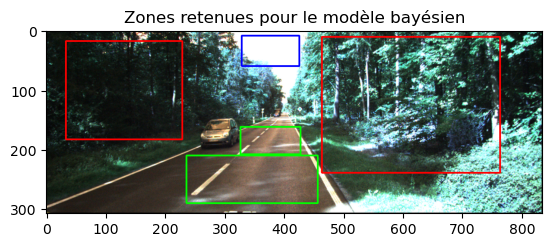

Dimension de l'image : 234 lignes x 341 colonnes x 3 canaux
Type de l'image : uint8
RoI_Features : (68, 38, 3)
features
[[ 56  45  36]
 [ 60  48  37]
 [ 60  46  38]
 ...
 [172 234 234]
 [177 242 253]
 [184 254 253]]
labels
[ 1  1  1 ... -1 -1 -1]
Batch négatif n° 1 enregistré !
RoI_Features : (11, 15, 3)
features
[[ 56  45  36]
 [ 60  48  37]
 [ 60  46  38]
 ...
 [255 255 255]
 [255 255 255]
 [255 255 255]]
labels
[ 1  1  1 ... -2 -2 -2]
Batch négatif n° 2 enregistré !
RoI_Features : (193, 191, 3)
features
[[ 56  45  36]
 [ 60  48  37]
 [ 60  46  38]
 ...
 [255 255 255]
 [254 255 255]
 [255 255 255]]
labels
[ 1  1  1 ... -2 -2 -2]
Batch négatif n° 1 enregistré !
RoI_Features : (235, 300, 3)
features
[[56 45 36]
 [60 48 37]
 [60 46 38]
 ...
 [37 55 51]
 [39 55 39]
 [36 54 43]]
labels
[ 1  1  1 ... -1 -1 -1]
Batch négatif n° 2 enregistré !
RoI_Features : (92, 172, 3)
features
[[ 56  45  36]
 [ 60  48  37]
 [ 60  46  38]
 ...
 [ 73  99 116]
 [ 70  92 114]
 [ 53  82  88]]
labels
[ 1  1  1 

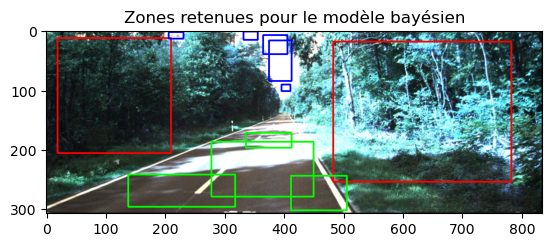

In [78]:
##############################################################################################
##### Training 
##############################################################################################

data_features=[]
data_labels=[]
classes = np.unique([-1, 1,-2])
#img_bgr=cv2.imread("C:/Users/gauth/Documents/2A/MI204/Images_Classif/Kitti_road/008.png")
img_bgr=changement_couleur_image(cv2.imread("C:/Users/gauth/Documents/2A/MI204/Images_Classif/Kitti_road/008.png"),None,False)
img_bgr=cv2.imread("C:/Users/gauth/Documents/2A/MI204/Images_Classif/Kitti_road/008.png")

data_features,data_labels=feed(img_bgr,classes,data_features,data_labels,1)
img_bgr=changement_couleur_image(cv2.imread("C:/Users/gauth/Documents/2A/MI204/Images_Classif/Kitti_road/1.png"),None,False)
img_bgr=cv2.imread("C:/Users/gauth/Documents/2A/MI204/Images_Classif/Kitti_road/145.png")
data_features,data_labels=feed(img_bgr,classes,data_features,data_labels,0)




-----------------------------
## Interférence 
------------------


### Choix du modèle clf

In [ ]:
fichier = open("analyse_qualite.txt", "a")


####################################################################################################
### Choix du modèle
####################################################################################################

list_clf=[]

#################################
##### pour 2 classes uncomment les lignes suivantes
#for i in range(1,10):
#    list_clf.append(GaussianNB(priors = [0+i*0.1,1-i*0.1]))
#for i in range(1,10):
#    list_clf.append(QuadraticDiscriminantAnalysis(priors = [0+i*0.1,1-i*0.1]))
#################################


#################################
##### pour 3 classes uncomment les lignes suivantes
#for i in range(2,9):
#    for j in range(1,10-i):
#        list_clf.append(GaussianNB(priors = [ round(0+i*0.1,1) , round((1-0.1*i)-j*0.1,1) , round(j*0.1,1) ]))
#for i in range(2,9):
#    for j in range(1,10-i):
#        list_clf.append(QuadraticDiscriminantAnalysis(priors = [ round(0+i*0.1,1) , round((1-0.1*i)-j*0.1,1) , round(j*0.1,1) ]))
#################################

#################################
##### pour des tests ciblés uncomment les lignes suivantes
#clf=QuadraticDiscriminantAnalysis(priors=[0.3, 0.7])
list_clf=[QuadraticDiscriminantAnalysis(priors=[0.2, 0.2, 0.6]) , GaussianNB(priors=[0.2, 0.2, 0.6]) ]
clf=QuadraticDiscriminantAnalysis(priors=[0.3,0.7])
clf=QuadraticDiscriminantAnalysis(priors=[0.1, 0.1, 0.8])
#################################



### Boucles d'affichages et d'interférences

Dimension de l'image : 234 lignes x 341 colonnes x 3 canaux
Type de l'image : uint8

 Dimension de l'image : 234 lignes x 341 colonnes x 3 canaux
Type de l'image : uint8


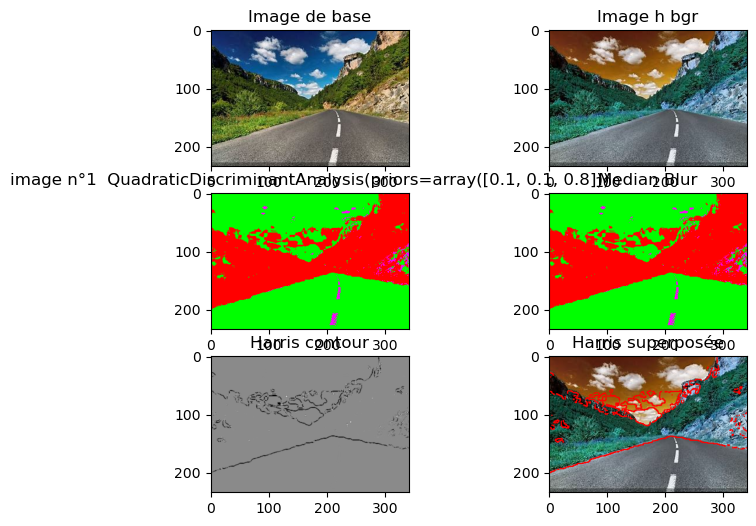

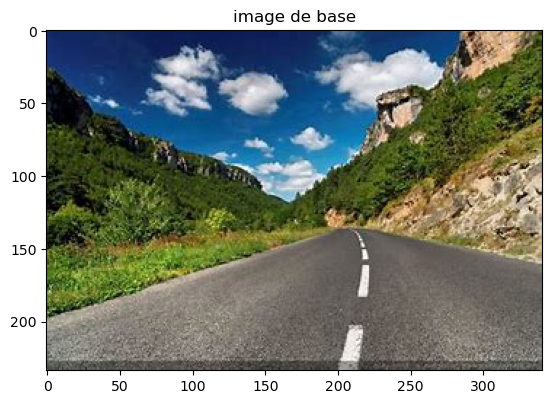

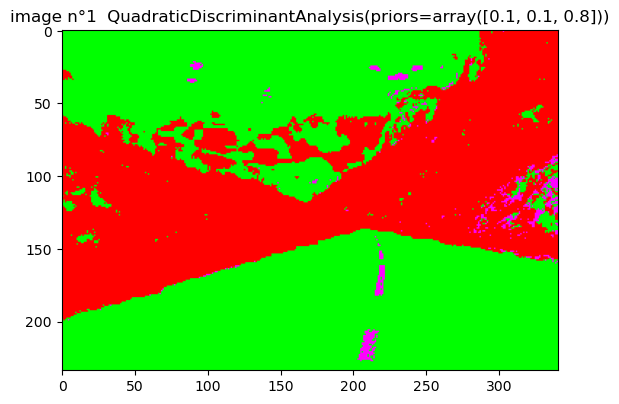

Dimension de l'image : 243 lignes x 364 colonnes x 3 canaux
Type de l'image : uint8

 Dimension de l'image : 243 lignes x 364 colonnes x 3 canaux
Type de l'image : uint8


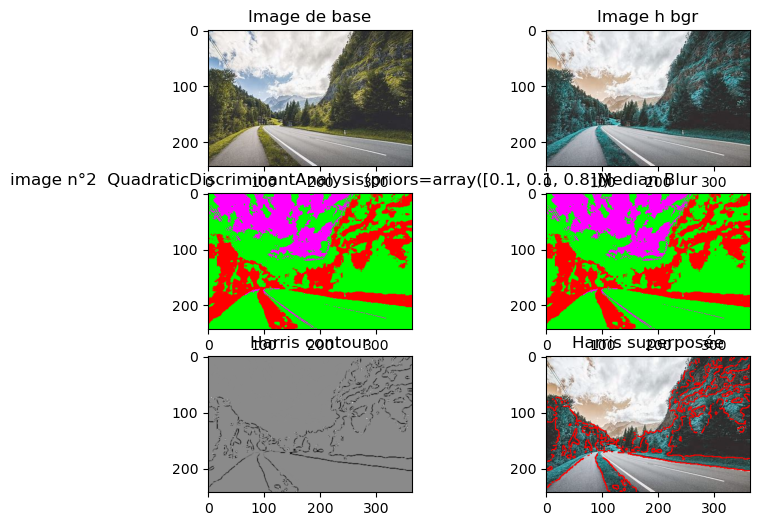

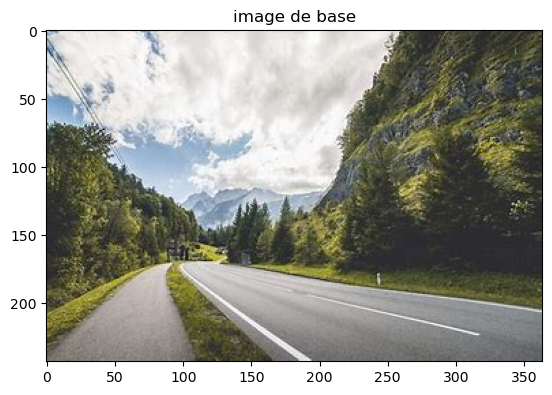

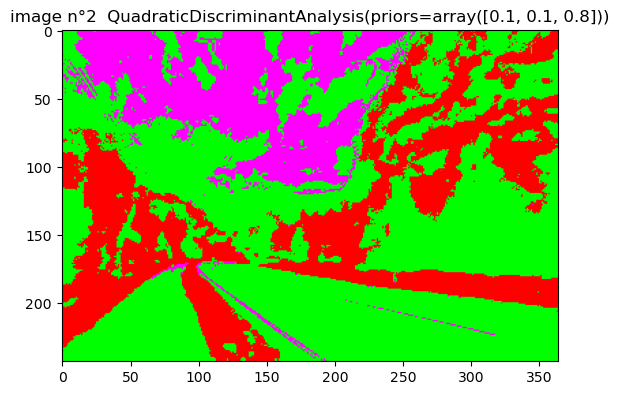

Dimension de l'image : 234 lignes x 328 colonnes x 3 canaux
Type de l'image : uint8

 Dimension de l'image : 234 lignes x 328 colonnes x 3 canaux
Type de l'image : uint8


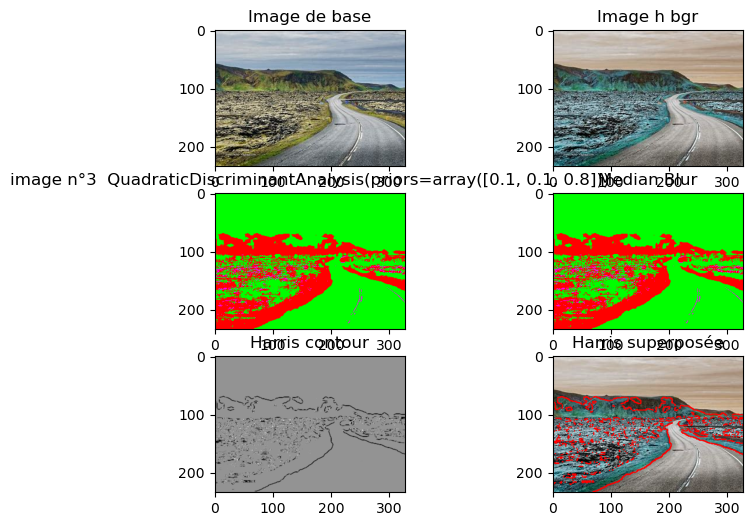

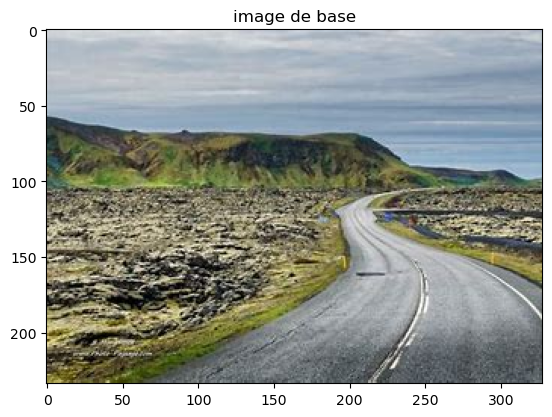

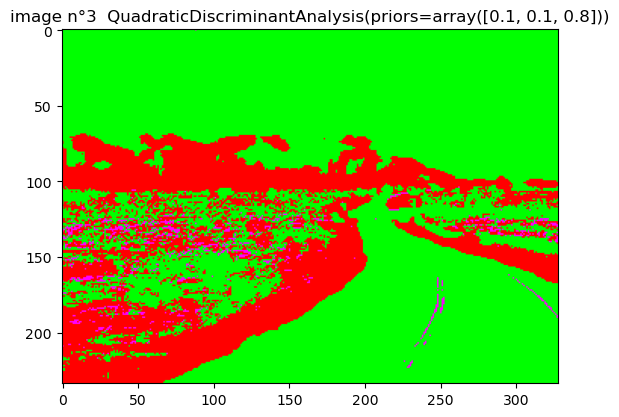

Dimension de l'image : 265 lignes x 397 colonnes x 3 canaux
Type de l'image : uint8

 Dimension de l'image : 265 lignes x 397 colonnes x 3 canaux
Type de l'image : uint8


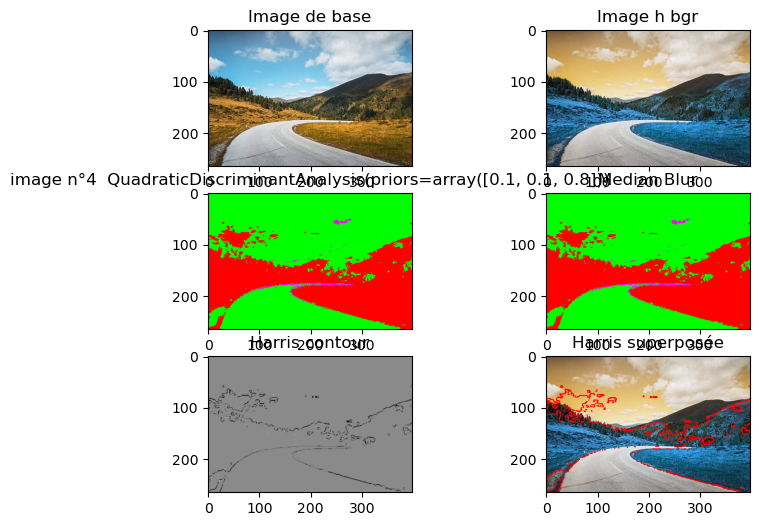

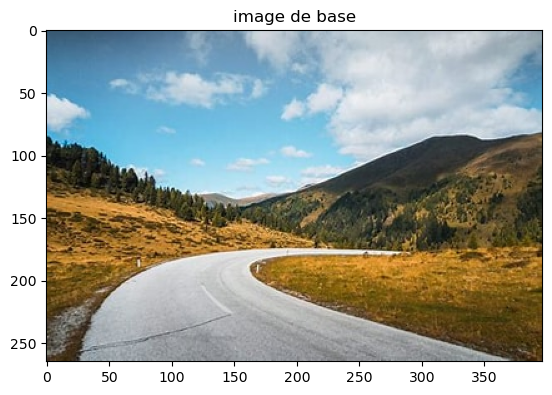

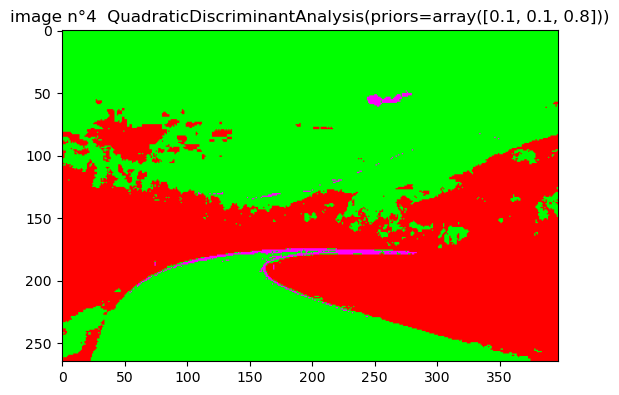

Dimension de l'image : 243 lignes x 432 colonnes x 3 canaux
Type de l'image : uint8

 Dimension de l'image : 243 lignes x 432 colonnes x 3 canaux
Type de l'image : uint8


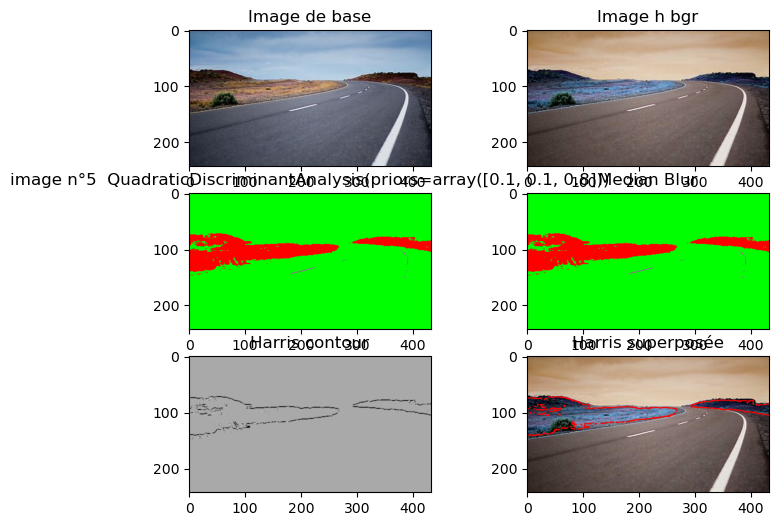

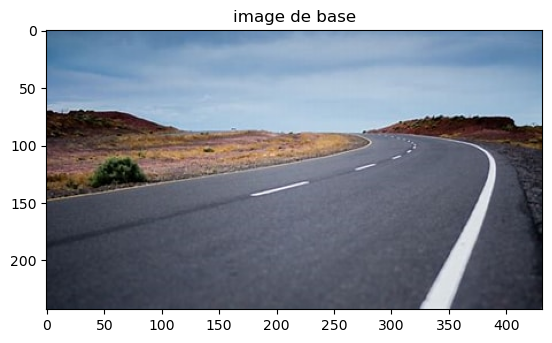

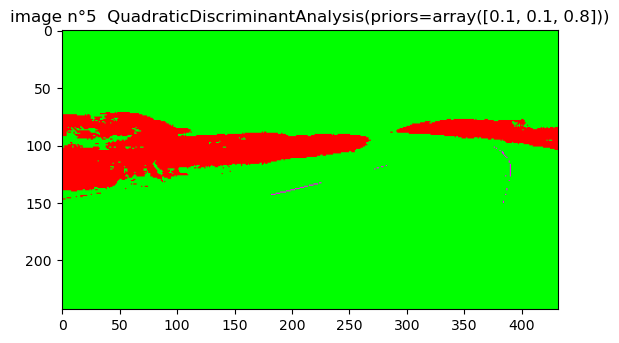

Dimension de l'image : 234 lignes x 375 colonnes x 3 canaux
Type de l'image : uint8

 Dimension de l'image : 234 lignes x 375 colonnes x 3 canaux
Type de l'image : uint8


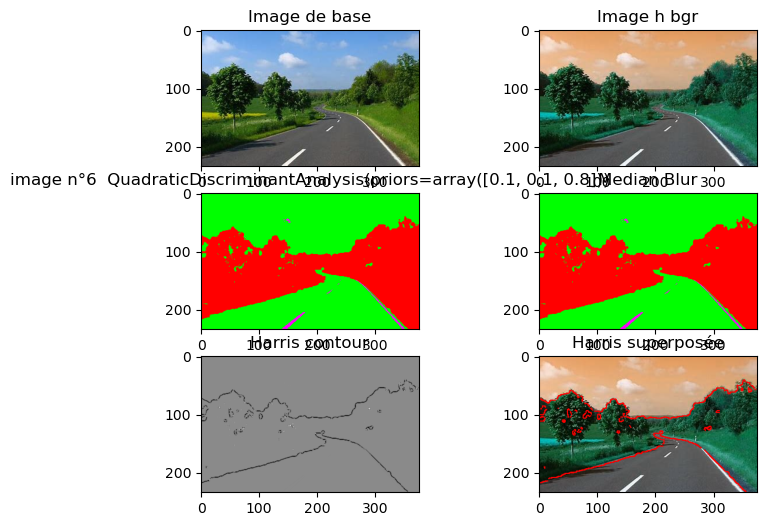

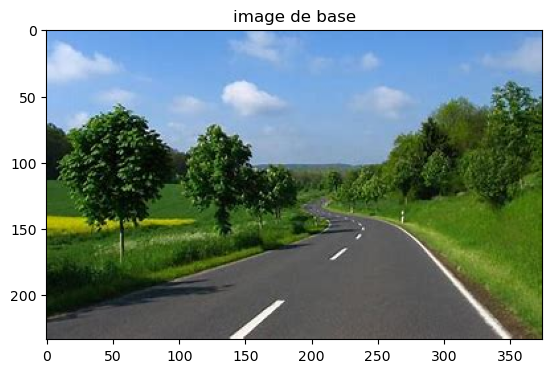

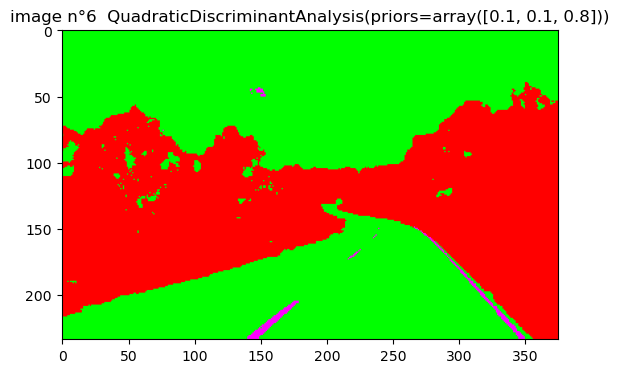

end!!!!!!


In [81]:
## choix des images 
#for i in ["032","008","063","067","110","128","133","145","152","161","184"]:
for i in ["1","2","3","4","5","6"]:
#for i in ["032"]:
    #for clf in list_clf:

        ###############################################################################################################
        # Parcours des images de la bibliothèque sélectionnées et les clf choisis 
        ###############################################################################################################
        img_bgr = cv2.imread("C:/Users/gauth/Documents/2A/MI204/Images_Classif/Kitti_road/"+i+".png")
        img_origine = cv2.copyMakeBorder(img_bgr,0,0,0,0,cv2.BORDER_REPLICATE)
        img_bgr=changement_couleur_image(img_bgr,None,False)
        img_bgr=cv2.imread("C:/Users/gauth/Documents/2A/MI204/Images_Classif/Kitti_road/"+i+".png")
        (h_img,w_img,c_img) = img_bgr.shape
        print("\n Dimension de l'image :",h_img,"lignes x",w_img,"colonnes x",c_img,"canaux") 
        print("Type de l'image :",img_bgr.dtype)

        ###############################################################################################################    
        # First fit the whole data to the model
        ###############################################################################################################
        clf.fit(data_features,data_labels)  
        # Test the prediction on the whole image
        img_clustered=cv2.copyMakeBorder(img_bgr,0,0,0,0,cv2.BORDER_REPLICATE)
        img_samples = np.reshape(img_clustered,(-1,3))
        img_labels = clf.predict(img_samples)
        img_result = np.reshape(img_labels,(h_img,w_img))
        img_clustered[np.where(img_result == 1)] = [0,255,0]
        img_clustered[np.where(img_result == -1)] = [255,0,0]
        img_clustered[np.where(img_result == -2)] = [255,0,255]
        img_clustered[np.where(img_result == -3)] = [255,100,100]
        
        ###############################################################################################################
        #### lissage de l'image
        ###############################################################################################################    
        # Reading the image
        image=cv2.copyMakeBorder(img_clustered,0,0,0,0,cv2.BORDER_REPLICATE)
        # Applying the filter
        medianBlur=image
        #medianBlur = cv2.medianBlur(image, 9)
        #print("type:",medianBlur.dtype)
        #affichage_et_collecte_statistiques(medianBlur,clf,i,True)


        ###############################################################################################################
        #### contour de la route
        ############################################################################################################### 
        dst_norm_scaled=detection_contour_harris(medianBlur)
        img_sortie=affichage_route(img_origine,dst_norm_scaled)
        dst_norm_scaled2=detection_contour_harris(img_origine)

        
        ########################################################################################
        ### affichage 
        ########################################################################################
        if 1==1:      
            fig = plt.figure()
            ax1 = fig.add_subplot(3,2,1)
            r,g,b = cv2.split(img_origine) # on passe en rgb
            img_origine = cv2.merge([b,g,r])
            ax1.imshow(img_origine)
            ax2 = fig.add_subplot(3,2,3)
            ax2.imshow(img_clustered)
            ax2.title.set_text('image n°'+i+"  "+str(clf))
            ax3 = fig.add_subplot(3,2,4)
            ax3.imshow(medianBlur)
            ax4 = fig.add_subplot(3,2,5)
            ax4.imshow(dst_norm_scaled,cmap="gray")
            ax5 = fig.add_subplot(3,2,6)
            ax5.imshow(img_sortie,cmap="gray")
            ax4.title.set_text('Harris contour')
            ax1.title.set_text('Image de base')
            ax3.title.set_text('Median Blur')
            ax5.title.set_text('Harris superposée')
            ax6 =fig.add_subplot(3,2,2)
            ax6.imshow(img_bgr)
            ax6.title.set_text('Image h bgr')
            fig.set_figheight(6)
            fig.set_figwidth(8)
            plt.show()
            
            
            
fichier.close()
print("end!!!!!!")